In [1]:
from hotgrad.variable import Variable

from torch import FloatTensor
from torch.autograd import Variable as tVariable
from torch.nn.functional import relu, tanh

from numpy import isclose

import matplotlib.pylab as plt

from dataset_generator import generate_dataset

import numpy as np

%matplotlib inline

Modules to be tested:

**Operands**:
- <font color=green>add</font>
- <font color=green>sub</font>
- <font color=green>mul</font>
- <font color=green>matmul</font>
- <font color=green>pow</font>
- <font color=green>mean</font>

**Layers**:
- linear

**Losses**:
- MSE

**Activations**:
- <font color=green>ReLU</font>
- <font color=green>Tanh</font>

torch.Size([1000, 2]) torch.Size([1000, 2]) torch.Size([1000, 2]) torch.Size([1000, 2])


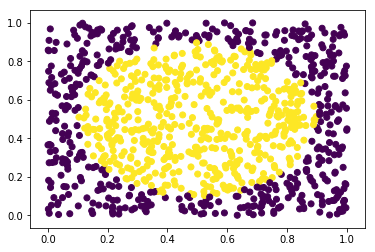

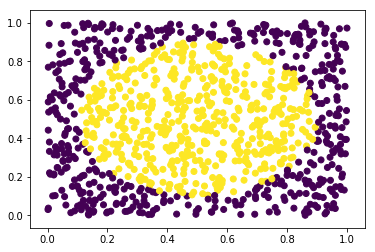

In [5]:
one_hot_encoding=True
X_train, X_test, y_train, y_test = generate_dataset(one_hot_encoding=one_hot_encoding)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

if one_hot_encoding:
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:, 0])
    plt.show()
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test[:, 0])
else:
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    plt.show()
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

### Test 2D

In [5]:
def chain(var1, var2, var3, var4, var5):
    temp = (var1.pow(2) + var2 - var3 - var3).pow(3)
    
    if isinstance(var1, Variable):
        temp = temp.relu()
    else:
        temp = relu(temp)
    temp = ((temp*var1) @ var4) - var5

    if isinstance(var1, Variable):
        temp = temp.tanh()
    else:
        temp = tanh(temp)

    temp = ((temp + var5) * var5).pow(3)
    return temp.mean()

max_ = 10
n_tests = 10

correct = True
for i in range(n_tests):
    dim1 = np.random.randint(1, max_)
    dim2 = np.random.randint(1, max_)
    dim3 = np.random.randint(1, max_)

    var1 = FloatTensor(dim1, dim2).uniform_(-100, 100) 
    var2 = FloatTensor(dim1, dim2).uniform_(-100, 100) 
    var3 = FloatTensor(dim1, dim2).uniform_(-100, 100) 
    var4 = FloatTensor(dim2, dim3).uniform_(-100, 100) 
    var5 = FloatTensor(dim1, dim3).uniform_(-100, 100) 

    a, b, c, d, e = Variable(var1, requires_grad=True), Variable(var2, requires_grad=True), Variable(var3, requires_grad=True), Variable(var4, requires_grad=True), Variable(var5, requires_grad=True)
    res = chain(a, b, c, d, e)

    ta, tb, tc, td, te = tVariable(var1, requires_grad=True), tVariable(var2, requires_grad=True), tVariable(var3, requires_grad=True), tVariable(var4, requires_grad=True), tVariable(var5, requires_grad=True)
    tres = chain(ta, tb, tc, td, te)

    res.backward()
    tres.backward()

    correct = correct and isclose(res.data, tres.data, atol=0).all()
    correct = correct and isclose(a.grad, ta.grad.data, atol=0).all()
    correct = correct and isclose(b.grad, tb.grad.data, atol=0).all()
    correct = correct and isclose(c.grad, tc.grad.data, atol=0).all()
    correct = correct and isclose(d.grad, td.grad.data, atol=0).all()
    
    if not correct:
        print("ERROR! :(")
        break
        
if correct:
    print("good boy! :)")

good boy! :)
